<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Resultados_Hands-On_Estudiantes/Pedro_Ferreira_Juego_de_la_Vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

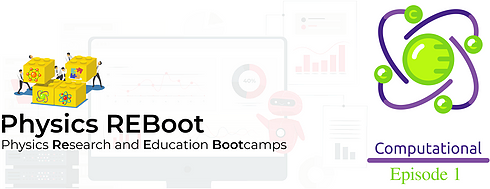

#***El Juego de la Vida***


El 'Juego de la Vida' es un modelo matemático y computacional para un sistema dinámico que evoluciona en pasos discretos. Concebido por John Horton Conway, el juego consiste en un array bidimensional infinito vacío sobre el cual algunas celdas se inicializan con **'vida'**, es decir algun número, tipicamente **1**.

El juego tiene un numero de reglas que se pueden condensar de la siguiente manera:


* Cualquier célula con **2** o **3** vecinos **'vivos'** sobrevive.
* Cualquier célula muerta con exactamente **3** vecinos **'vivos'** cobra vida.
* El resto de las células **'vivas'** mueren en la siguiente generación. De manera similar, las células muertas permanecen muertas.


A lo largo del tiempo, nuevas variantes fueron creadas al introducir, remover o cambiar las reglas. Actualmente, existen varias implementaciones eficientes de este juego en distintos lenguajes y plataformas como **Golly**, **Mirek's Cellebration** y **Xlife**. 

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *juego de la vida* basada en las reglas originales sobre un grid 20x20.
* Ilustrar la evolución del sistema.
* Modificar el algoritmo para simular un array infinito a través de condiciones de borde periodicas / traslaciones (opcional).

Existen varias maneras de realizar esto. Por ahora, pondremos en práctica los conocimientos aprendidos en **introducción a python**, **pensamiento algorítmico** asi como las librerías **numpy** y **matplotlib** 


Empezemos por cargar las librerias y funciones:

*   numpy con el pseudónimo np
*   de la librería matplotlib, la función pyplot como plt
*   de la librería matplotlib, la función animation como animation

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

Podemos describir el programa que determina la evolución de las celulas de la siguiente manera: 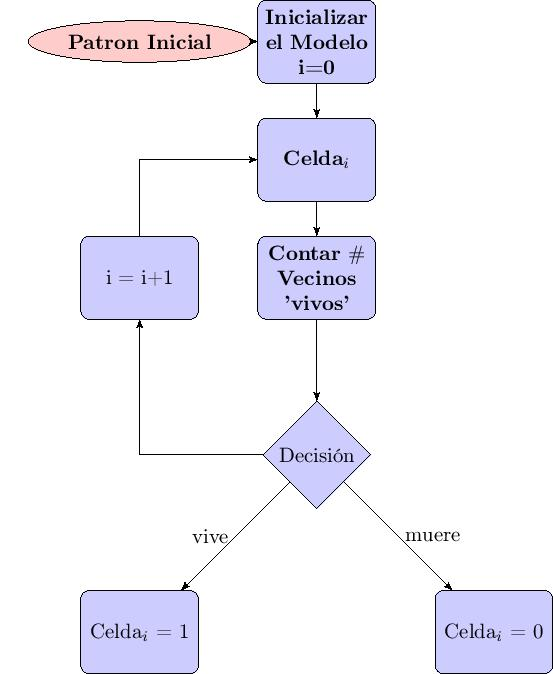

Siguiendo este algoritmo procedemos a decribir, generar el patrón inicial e inicializar el modelo:


*   Creamos un array de dos dimensiones (una cuadricula) que por los momentos estara vacia utilizando la función **np.zeros**

*   Definimos una semilla para la definición de números aleatorios utilizando la función **np.random.seed**

*   Rellenamos aleatoriamente algunos espacios dentro del array o  cuadrícula, estas van a ser nuestras células vivas, le asignamos el valor **1** a la cordenada x,y (recuerda que las coordenadas del array corresponden a una posición en una matriz). Usamos la función **np.random.randint**



In [ ]:
#Definir el tamaNo del grid
DimensionX = 100;
DimensionY = 100;
# Inicializamos el array 2D, que llamaremos grid:
Grid1  = np.zeros((DimensionX,DimensionY),dtype=int) #Creamos una cuadricula 
i=0
j=0
for i in list(range(0,DimensionX)):
  for j in list(range(0,DimensionY)):
    Grid1[i,j] = int(np.random.randint(0,2))
print(Grid1) #Creamos las cuadriculas con vidad.

[[1 0 1 ... 1 1 0]
 [1 0 0 ... 1 0 1]
 [0 1 0 ... 1 1 0]
 ...
 [0 0 0 ... 0 1 1]
 [1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]


Podemos visualizar el array inicializado a traves de **matplotlib** utilizando las funciones **figure y imshow**.

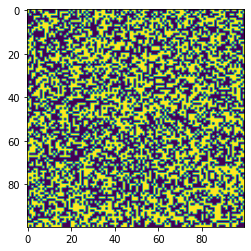

In [ ]:
plt.figure()
plt.imshow(Grid1)

In [ ]:
i=1
j=4
valor = Grid1[(i-1)%DimensionX,(j-1)%DimensionY] + Grid1[(i)%DimensionX,(j-1)%DimensionY] + Grid1[(i+1)%DimensionX,(j-1)%DimensionY] + Grid1[(i-1)%DimensionX,(j)%DimensionY] + Grid1[(i+1)%DimensionX,(j)%DimensionY] + Grid1[(i-1)%DimensionX,(j+1)%DimensionY] + Grid1[(i)%DimensionX,(j+1)%DimensionY] + + Grid1[(i+1)%DimensionX,(j+1)%DimensionY]
print(valor)
print(Grid1[i,j])


3
0


Para contar el número de vecinos vivos necesitamos primero evaluar el entorno inmediato de cada célula. La siguiente figura ilustra en terminos de indices cuales serian los valores que debemos considerar:


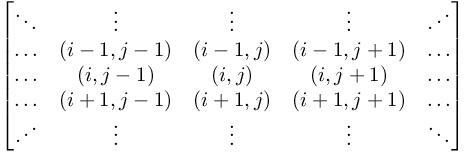

Describimos entonces la región local de cada celda ***$i$*** 
La región consiste en las células del entorno, es decir contando desde **(i-1, j-1)** hasta **(i+1, j+1)**.

Para esto definimos una función la cual producira un sub array con las celulas dentro de la region.

In [ ]:
#Definmos un segundo Grid para ver como evoluciona.

def Ciclos(Grid1):
  Grid2  = np.zeros((DimensionX,DimensionY)) 
  #cantidad = 10
  #for n in list(range(0,cantidad)):
  for i in list(range(0,DimensionX)):
    for j in list(range(0,DimensionY)):
      valor = Grid1[(i-1)%DimensionX,(j-1)%DimensionY] + Grid1[(i)%DimensionX,(j-1)%DimensionY] + Grid1[(i+1)%DimensionX,(j-1)%DimensionY] + Grid1[(i-1)%DimensionX,(j)%DimensionY] + Grid1[(i+1)%DimensionX,(j)%DimensionY] + Grid1[(i-1)%DimensionX,(j+1)%DimensionY] + Grid1[(i)%DimensionX,(j+1)%DimensionY] + + Grid1[(i+1)%DimensionX,(j+1)%DimensionY]
      if (3 >= valor >= 2 and Grid1[i,j] ==1):
        Grid2[i,j] = 1;
      elif (valor ==3 and Grid1[i,j] ==0):
        Grid2[i,j] = 1;
      else:
        Grid2[i,j] = 0
      Grid1[i,j] = Grid2[i,j]
  return Grid1
  #plt.figure()
  #plt.imshow(Grid2)



En el siguiente paso, basado en las reglas descritas en el principio, definimos la logica del programa que decidira si una célula vive o muere:

Finalmente, es conveniente definir una función que itere sobre cada una de las celdas y de esa manera agrupe la evolución del array por generaciones o ciclos:

Hecho todo esto, ahora simplemente nos queda generar una animación para asi poder observar como evoluciona el **juego de la vida** segun nuestra implementacion. Para esto usaremos el modulo **animation** de **matplotlib**, y describir una nueva funcion **Animar** que se encargar de iterar sobre la funcion **Ciclo**

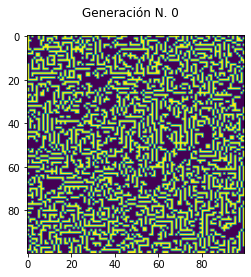

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML, Image
def Animar(i):
    Ciclos(Grid1)
    ax1.clear()
    ax1.imshow(Grid1)
    plt.suptitle('Generación N. {}'.format(i))

fig = plt.figure()
ax1 = fig.add_subplot()
animacion = animation.FuncAnimation(fig, Animar, interval=200,frames=200)

animacion.save('Juego_de_la_vida.gif', writer='pillow', fps=60)
Image(url='Juego_de_la_vida.gif')


In [ ]:
Image(url='Juego_de_la_vida.gif')